# Cavite entrainee - Re = 400

In [1]:
from trustutils import run

run.introduction("Yannick Gorsse")
run.description("")
run.TRUST_parameters()

## Introduction 
 Validation made by : Yannick Gorsse



 Report generated 18/02/2022

### Description 


### TRUST parameters 
 * Version TRUST: 1.8.5_beta
 * Binary used: /export/home/catA/es243900/projects/devElie/TRUST/exec/TRUST_mpi_opt (built on TRUST /export/home/catA/es243900/projects/devElie/TRUST/Validation/Rapports_automatiques/Verification/Verification_codage/cavite_entrainee_2D/build)

In [2]:
from trustutils import run
import os, sys

# Load MEDCoupling environment
run.useMEDCoupling()

# Trigger the copy of the src directory into the build directory:
run.defaultSuite_ = run.TRUSTSuite(runPrepare=False)

# Path of weird mesh Python module
sys.path.append(os.environ["TRUST_ROOT"] + "/Validation/Rapports_automatiques/Verification/PolyMAC/share/maquette_decapoly/src/")

# Invoke prepare_python.py (which structures the directories), and copy post_run script
origin, build_dir = os.getcwd(), run.defaultSuite_.getBuildDirectory()
os.chdir(build_dir)
exec(open( "prepare_python.py").read())  #  the various run.addCase() are called there
os.chdir(origin)

for i in ["NCa", "NCr", "cartesian", "triangle"]:
    for j in ["CoviMAC", "PolyMAC"]:
        run.addCase(f"{i}/{j}","jdd.data")

run.addCase("cartesian/VDF","jdd.data")
run.addCase("triangle/VEFPreP1B","jdd.data")
    
run.printCases()
run.runCases()


### Test cases 
* NCa/CoviMAC/jdd.data : 
* NCa/PolyMAC/jdd.data : 
* NCr/CoviMAC/jdd.data : 
* NCr/PolyMAC/jdd.data : 
* cartesian/CoviMAC/jdd.data : 
* cartesian/PolyMAC/jdd.data : 
* triangle/CoviMAC/jdd.data : 
* triangle/PolyMAC/jdd.data : 
* cartesian/VDF/jdd.data : 
* triangle/VEFPreP1B/jdd.data : 


Running **with Sserver**...
  => A total of 10 cases were (successfully) run in 77.4s.


**Reference : The lid-driven square cavity flow: numerical solution with a 1024 x 1024 grid, Marchi et al., Journal of the Brazilian Society of Mechanical Sciences and Engineering, 2009**

## Comparisons

### Comparison - vx

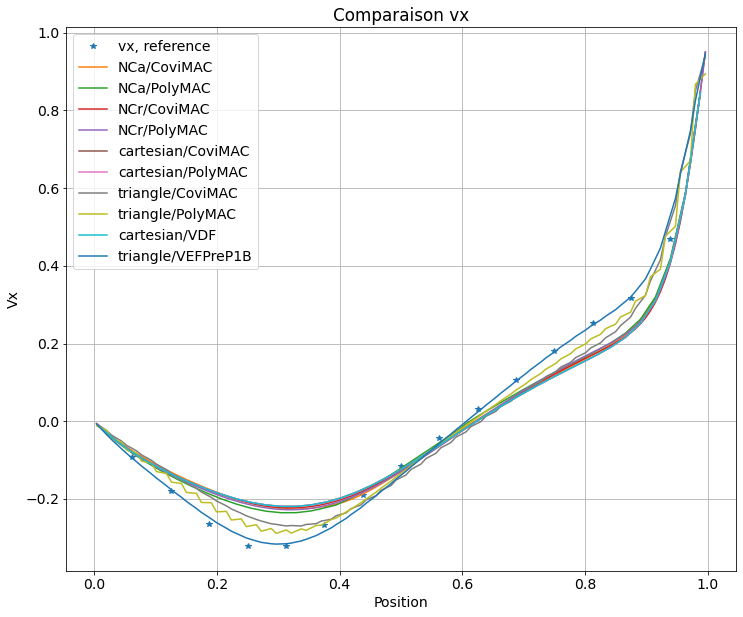

In [3]:
from trustutils import plot

a=plot.Graph("Comparaison vx")

data=plot.loadText("./ref_vx.txt")
a.add(data[0],data[1],marker="*",label="vx, reference")

for i in ["NCa", "NCr", "cartesian", "triangle"]:
    for j in ["CoviMAC", "PolyMAC"]:
        a.addSegment(f"{i}/{j}/jdd_VX.son",label=f"{i}/{j}",var="x")

a.addSegment("cartesian/VDF/jdd_VX.son",label="cartesian/VDF",var="x")
a.addSegment("triangle/VEFPreP1B/jdd_VX.son",label="triangle/VEFPreP1B",var="x")
a.label("Position", "Vx")


### Comparison - vy

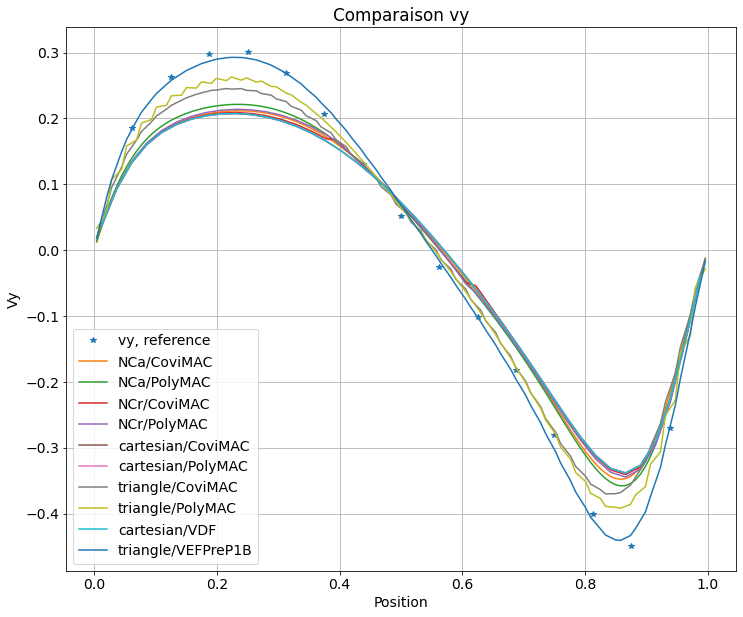

In [4]:
from trustutils import plot

a=plot.Graph("Comparaison vy")

data=plot.loadText("./ref_vy.txt")
a.add(data[0],data[1],marker="*",label="vy, reference")

for i in ["NCa", "NCr", "cartesian", "triangle"]:
    for j in ["CoviMAC", "PolyMAC"]:
        a.addSegment(f"{i}/{j}/jdd_VY.son",label=f"{i}/{j}",var="y")

a.addSegment("cartesian/VDF/jdd_VY.son",label="cartesian/VDF",var="y")
a.addSegment("triangle/VEFPreP1B/jdd_VY.son",label="triangle/VEFPreP1B",var="y")
a.label("Position", "Vy")